## **Housing Price Prediction**

**Problem Statement:**

The problem requires us to predict the price of a house, in a particular location, based on the different features of the house. This will help the buyers to make accurate decisions, based on the pricing trends in the neighbourhood. It will also help sellers set a realistic target for the sale that they anticipate.

**Objective:**

To analyze all the features provided in the data set and arrive at a predictive solution for the price of a house.

**Attribute Information:**

*  cid: a notation for a house
*  dayhours: Date house was sold
*  price: Price is prediction target
*  room_bed: Number of Bedrooms/House
* room_bath: Number of bathrooms/bedrooms
* living_measure: square footage of the home
* lot_measure: quare footage of the lot
* ceil: Total floors (levels) in house
* coast: House which has a view to a waterfront
* sight: Has been viewed
* condition: How goodthe condition is (Overall)
* quality: grade given to the housing unit, based on grading system
* ceil_measure: square footage of house apart from basement
* basement_measure: square footage of the basement
*  yr_built: Built Year
*  yr_renovated: Year when house was renovated
* zipcode: zip
*   lat: Latitude coordinate
*   long: Longitude coordinate
*  living_measure15: Living room area in 2015(implies–some renovations) This might or might not have affected the lotsize area
*   lot_measure15: lotSizearea in 2015(implies–some renovations)
*   furnished: Based on the quality of room
*   total_area: Measure of both living and lot

**Roadmap:**

 We will follow the below roadmap, to arrive at a model, to predict prices for new data.

1.   Analyze Data: Use descriptive statistics and visualization to better understand the data available.
2.  Prepare Data: Use data transforms in order to better expose the structure of the prediction problem to modeling algorithms
3. Evaluate Algorithms: Design a test harness to evaluate a number of standard algorithms on the data and select the top few to investigate further.
4. Improve Results: Use algorithm tuning and ensemble methods to get the most out of well-performing algorithms on the data.
5. Present Results.

In [111]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from pandas import set_option
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#regression analysis
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV, cross_validate, KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.sparse.linalg import svds
%matplotlib inline

from scipy import stats, linalg
from scipy.stats import norm, skew, zscore
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D

# Display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 20
pd.options.display.float_format = "{:.2f}".format

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model


# **Exploratory Data Analysis**

Performing exploratory data analysis on the dataset. Below are some of the steps performed:

*  Univariate analysis – explore data types and description of the independent attributes including name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers


In [2]:
#Load the dataset
from google.colab import files
uploaded = files.upload()



Saving innercity.csv to innercity (1).csv


In [3]:
data=pd.read_csv('innercity.csv')
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.00,0,0,...,0,1956,0,98133,47.72,-122.34,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.00,0,0,...,800,1976,0,98023,47.32,-122.39,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.00,0,0,...,0,2006,0,98038,47.35,-122.00,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.00,0,0,...,0,1916,0,98133,47.70,-122.35,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.00,0,0,...,0,1954,0,98115,47.68,-122.27,1900,5940,0,5450


In [112]:
#Dimensions of the data
data.shape

(21612, 22)

**observation:**

This data set has 21613 rows and 23 columns.

In [5]:
#reviewing the data types of the data.
types=data.dtypes
print(types)

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object


**Data type observations:**

* cid - Unique value for each record - categorical, qualitative, nominal variable
* dayhours - Date of sale -	Date type object
* price	- Target Variable -	numerical (continuous), quantitative
* room_bed -	Total number of bedrooms - Numerical, discrete
* room_bath -Total number of bathrooms - Numerical, discrete
* living_measure - 	Total area of the house -	numerical (continuous), quantitative
* lot_measure - Total area of the lot -	numerical (continuous), quantitative
* ceil - Number of levels in the house - Numerical, discrete
* coast - Water front view - categorical (binary), qualitative, nominal
* sight - Number of times viewed -	Numerical, discrete
* condition - Rating of the house condition - categorical, qualitative, ordinal
* quality -	Rating based on the house quality -	categorical, qualitative, ordinal
* ceil_measure - Total area of the house excluding the basement -	numerical (continuous), quantitative
* basement_measure - Total are of the basement - numerical (continuous), quantitative
* yr_built-The year the house was built-	Date type object
* yr_renovated - The latest year of renovation - Date type object
* zipcode - Zipcode	- Categorical, qualitative, nominal.
* lat -	Latitude coordinate	
* long - Longitude coordinate
* living_measure15 - Living room area in 2015 - numerical (continuous), quantitative
* lot_measure15	- lotSizearea in 2015 -	numerical (continuous), quantitative
* furnished -	Is the house furnished -categorical (binary), qualitative, nominal
* total_area - Living area+Lot area -	numerical (continuous), quantitative

[Note to self}Dependencies to be observed:
•	The dependency between living measure, lot measure, living measure15 and lot measure15 needs to be examined.
•	The data is in its raw form. Not scaled.



In [6]:
# Convert columns to categorical types
cols = list(data)
columns=(['quality','condition','coast','sight','furnished'])
for cols in columns:
    data[cols] = data[cols].astype('category')
print(data.dtypes)


cid                    int64
dayhours              object
price                  int64
room_bed               int64
room_bath            float64
living_measure         int64
lot_measure            int64
ceil                 float64
coast               category
sight               category
condition           category
quality             category
ceil_measure           int64
basement               int64
yr_built               int64
yr_renovated           int64
zipcode                int64
lat                  float64
long                 float64
living_measure15       int64
lot_measure15          int64
furnished           category
total_area             int64
dtype: object


In [8]:
#check for null values
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [9]:
# Check if there are any duplicate rows
any(data['cid'].duplicated())

True

**Observation:**


*   No null values in the given data set.
*   There are 356 duplicate records found in 'cid' column. Hence, we can safely assume that this column represents the customer id and the duplicates are indicative of customers with different houses.


In [10]:
#descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540182.16,367362.23,75000.00,321950.00,450000.00,645000.00,7700000.00
room_bed,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
room_bath,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
living_measure,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
lot_measure,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
ceil,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
ceil_measure,21613.00,1788.39,828.09,290.00,1190.00,1560.00,2210.00,9410.00
basement,21613.00,291.51,442.58,0.00,0.00,0.00,560.00,4820.00
yr_built,21613.00,1971.01,29.37,1900.00,1951.00,1975.00,1997.00,2015.00


**Observation:**

* price: Prices range from 75000 to7700000. Since the mean is greater then median, we can say that the distribution is right positively skewed. 
* room_bed: Number of bedrooms range from 0 to 33.75% of data values are around 4.This either means the data is highly skewed towards right or there could be outliers. 
* room_bath: Number of bathrooms range from 0 to 8.75% of data values are around 2.5 whereas the maximum value is 8.The data is highly skewed towards right. 
* living_measure: Range is from 918 to 13540. 
* lot_measure: Range is from 15106 to 165135. Mean is closer to the 75% range. The data is highly skewed towards right. 
* ceil: The values range from 1 to 3.5. Mean is equal to median. Normal distribution. 
* sight: Has been viewed from 0 to 4 times. Houses till the third quartile have been viewed 0 times. Data is right skewed 
* ceil_measure: square footage of house ranges from 290 to 9140 
* basement_measure: square footage of the basement 0 to 4820.Highily skewed data. 
* yr_built: Values range from 1900 to 2015. Data follows normal distribution, with mean closer ro median. 
* yr_renovated: Range is from 0 - 2015. Zero indicates that the house is not renovated. Highly skewed data, indicating that the house in the first two quartiles are not renovated. 
* living_measure15: Range is from 399 -6210. close to normal distribution. 
* lot_measure15: Range is from 651 -871200. 
* total_area: Range is from 1423 -1652659.Data is highly left skewed.

Derivated columns:

*  creating a column call house_age that is derived from the subtraction of date and yr_built
*   drop the yr_built column and data column.
*  create a is_renovated column. If the yr_renovated column is a non-zero, I'll set a 1 to the renovated column. Then, I will drop the yr_renovated column.

In [11]:
data['dayhours'] = pd.to_datetime(data['dayhours'])
data["house_age"] = data["dayhours"].dt.year - data['yr_built']
data['is_renovated'] = data['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)
data=data.drop('yr_renovated', axis=1)
data=data.drop('yr_built', axis=1)
data.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,house_age,is_renovated
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.00,0,0,...,0,98133,47.72,-122.34,2120,7553,1,16477,58,0
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.00,0,0,...,800,98023,47.32,-122.39,2260,8800,0,10050,38,0
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.00,0,0,...,0,98038,47.35,-122.00,2370,4348,0,6694,9,0
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.00,0,0,...,0,98133,47.70,-122.35,1520,3844,0,4664,98,0
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.00,0,0,...,0,98115,47.68,-122.27,1900,5940,0,5450,61,0


In [12]:
#Transformed dayhours into sold year
data['year_sold'] = pd.DatetimeIndex(data['dayhours']).year
data['month_sold'] = pd.DatetimeIndex(data['dayhours']).month
data['time_sold'] = pd.DatetimeIndex(data['dayhours']).time
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,long,living_measure15,lot_measure15,furnished,total_area,house_age,is_renovated,year_sold,month_sold,time_sold
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.00,0,0,...,-122.34,2120,7553,1,16477,58,0,2014,11,00:00:00
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.00,0,0,...,-122.39,2260,8800,0,10050,38,0,2014,12,00:00:00
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.00,0,0,...,-122.00,2370,4348,0,6694,9,0,2015,4,00:00:00
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.00,0,0,...,-122.35,1520,3844,0,4664,98,0,2014,5,00:00:00
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.00,0,0,...,-122.27,1900,5940,0,5450,61,0,2015,4,00:00:00


Dropping dayhours, yr_built, time_sold, as they are redundant.

In [13]:
data=data.drop('cid', axis=1)
data=data.drop('dayhours', axis=1)
data=data.drop('time_sold', axis=1)

# **Data Visualization**
**univariate plots**

Skewness: 4.021715573048684
Kurtosis: 34.522444410072566


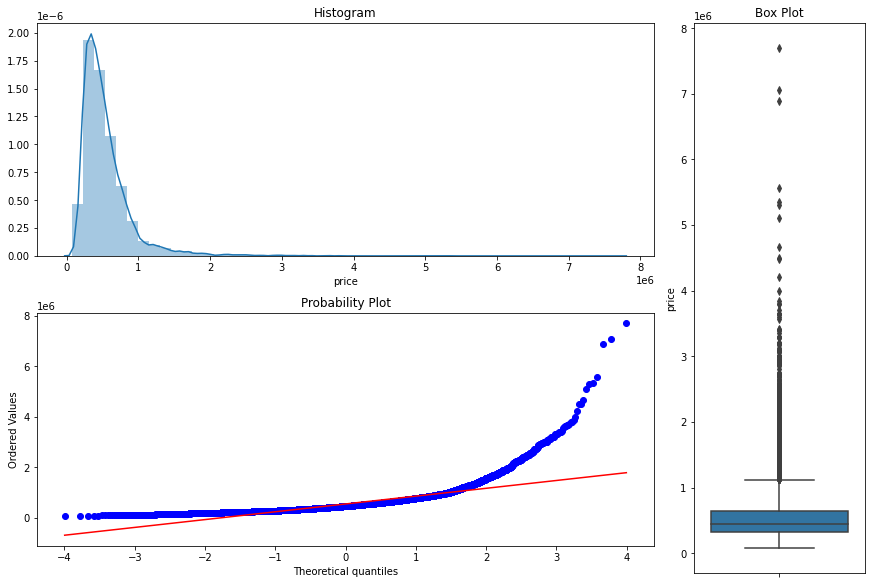

In [14]:
# check the distribution of target variable
def plotting_3_chart(df, feature): 
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## crea,ting a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
 

print('Skewness: '+ str(data['price'].skew())) 
print("Kurtosis: " + str(data['price'].kurt()))
plotting_3_chart(data, 'price')

**Observation:**

Price is right skewed, with most concentration between 0 - 1000000.

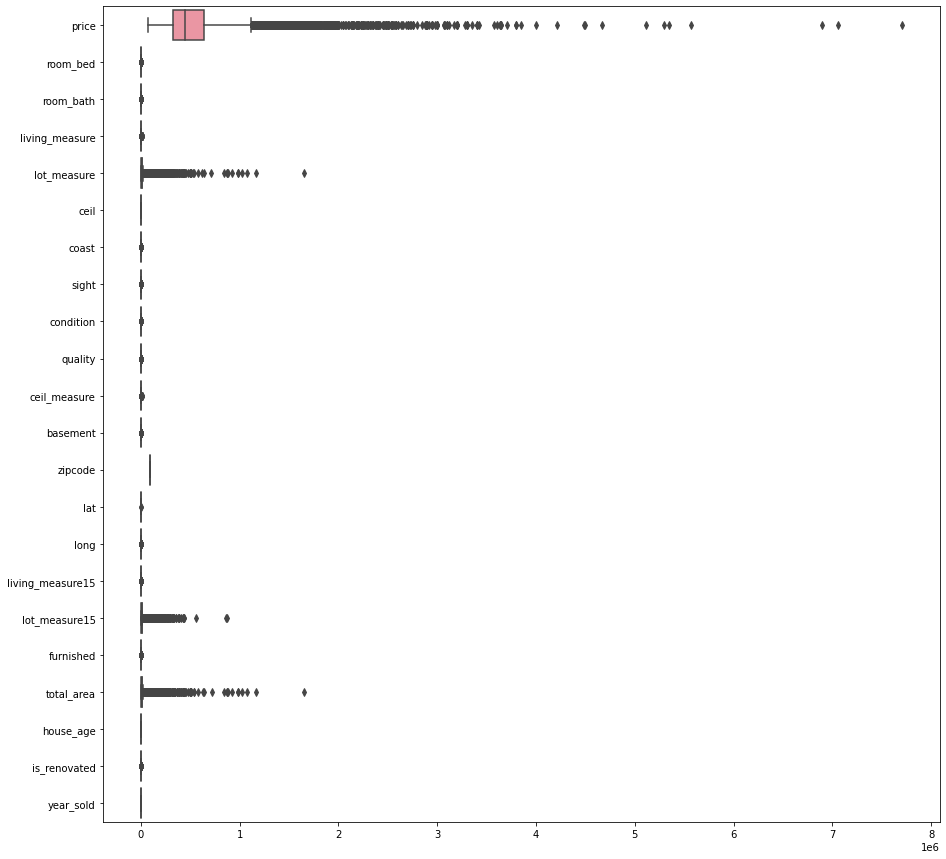

In [15]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15,15))
ax = sns.boxplot(data = data.iloc[:, 0:22], orient = 'h')

**Observation:**

*  price, lot measure, lot measure15 and total area have profound outliers
*   Analysing the outliers, I have found that the house with 33 bedrooms has only 1620 sqft of living area, which is not possible. Can drop this row, as this is data discrepency.


In [16]:
data=data.drop(data.index[750]) # dropping of the row with 33 number of bedrooms 

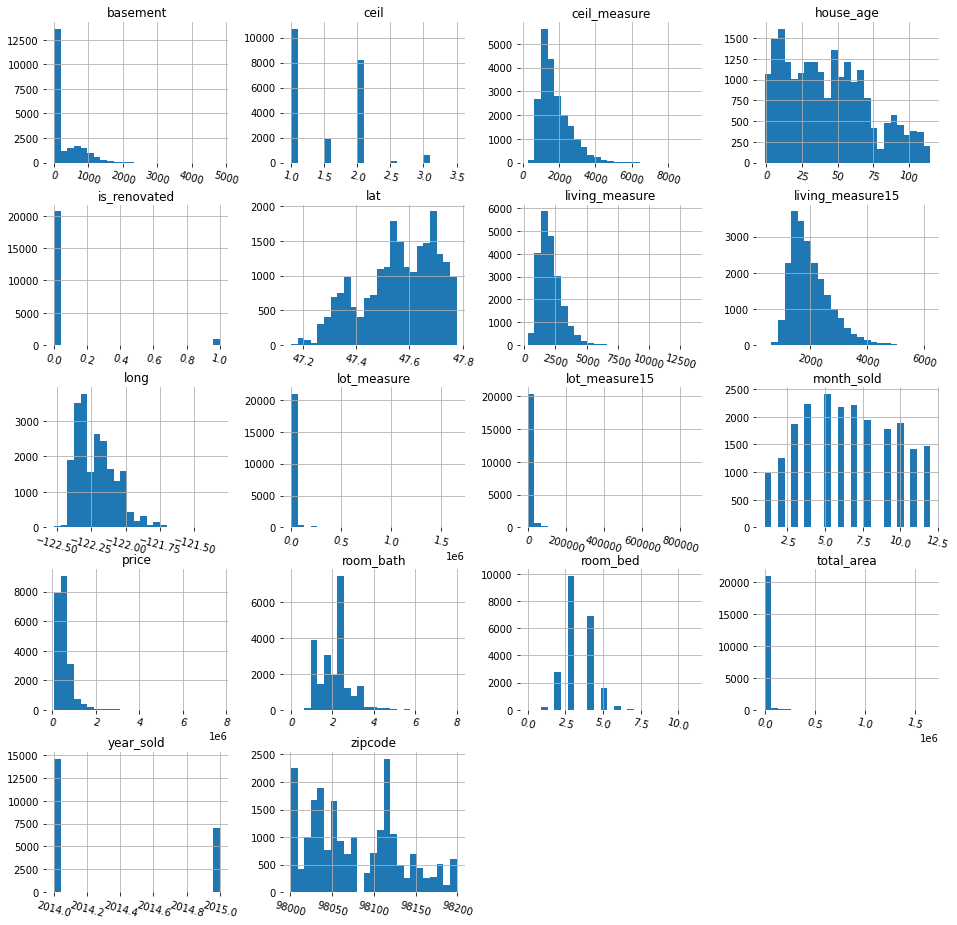

In [17]:
df1=data[['price', 'room_bed', 'room_bath', 'living_measure',
    'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
    'ceil_measure', 'basement','house_age', 'is_renovated', 'zipcode',
    'lat', 'long', 'living_measure15', 'lot_measure15','furnished','total_area','year_sold','month_sold']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

**Observation:**

* house_age is left skewed.
* yr_sold has just two values 2014 and 2015. we can use a group by.

# **Bi-variate Analysis**

**Continuous Variables**

In [18]:
numerical_features = data.select_dtypes(exclude='object').drop(['price'], axis=1)

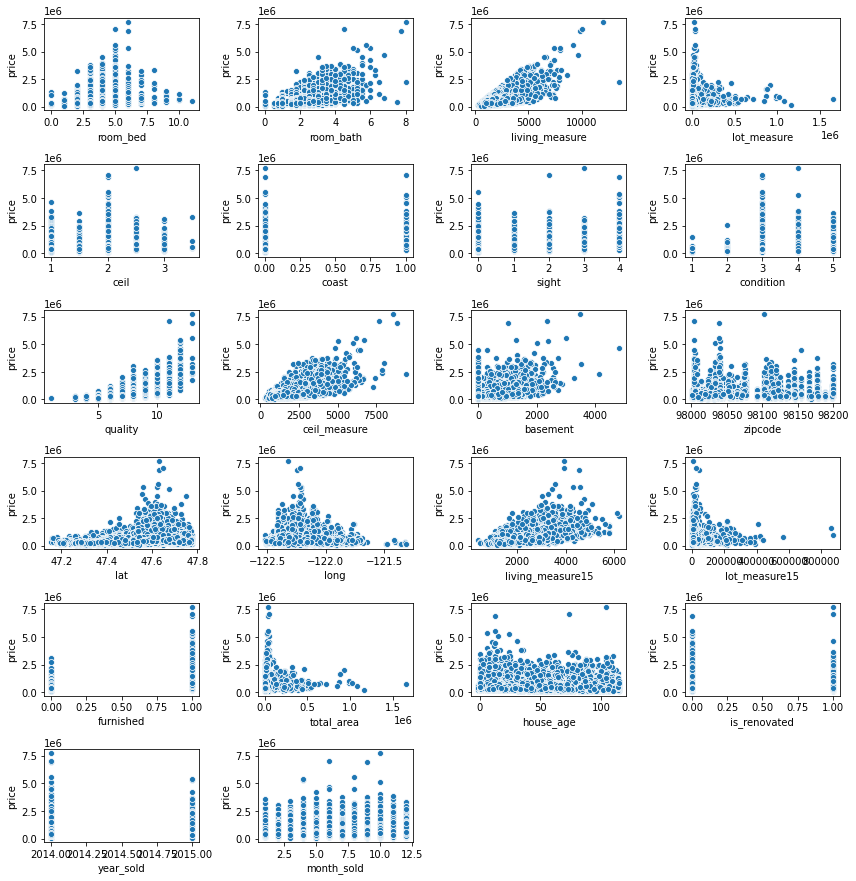

In [19]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],data['price'])
plt.tight_layout()
plt.show()

There is a clear linear association between the variables, indicating a strong positive relationship.

The house price is moderately correlated with the size of the basement (if basement present). There is also a small correlation with the year of the renovation (if renovated).

It might be more interesting for our analysis to classify basement and renovation as boolean variables (e.g., 0 for no basement, 1 for basement present). Let's create a new column in our dataset.

In [20]:
data['basement_present'] = data['basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement_present'] = data['basement_present'].astype('category')
data=data.drop('basement', axis=1)

We will analyse these new variables as categorical (see in few cells below).

But first, let's go back to the plots above and the two variables: ceil_measure and living_measure15. They seem to be strongly related to price. Let's analyse their associations (along with living_measure) using the pairgrid() function from seaborn. This function creates a matrix of axes and shows the relationship for each pair of the selected variables.

We will draw the univariate distribution of each variable on the diagonal Axes, and the bivariate distributions using scatterplots on the upper diagonal and kernel density estimation on the lower diagonal. We will create a function to display the paerson coefficient of each pair.

**Categorical Variables**


Now we're ready to start calculating a correlation between categorical variables and house prices in order to estimate which variable affect the house prices at most.

However, we want to subdivide our categorical variables into two subcategories: dichotomous and polytomous ones. This has effect on which correlation calculation methods to be applied to those sub-categories.

Taking into account two newly introduced variable we have a following sub-division of categorical variables.

Dichotomous variables:

*   coast
*  basement_present
*  is_renovated


Polytomous variables:

* Sight
* condition
* Quality

Dichotomous or binary variables are going to get their correlation calculated by means point biserial correlation and polytomous ones will be treated with Spearman's rank-order correlation correspondingly:

In [22]:
CATEGORICAL_VARIABLES = ["coast", 
                       "basement_present", 
                       "is_renovated", 
                       "sight", 
                       "condition",
                       "quality"]

for c in CATEGORICAL_VARIABLES:
    if c not in ["coast", "basement_present", "is_renovated"]:
        correlation = stats.pearsonr(data[c], data["price"])
    else:
        correlation = stats.pointbiserialr(data[c], data["price"])
    print("Correlation of %s to price is %s" %(c, correlation))

Correlation of coast to price is PointbiserialrResult(correlation=0.2663321082728777, pvalue=0.0)
Correlation of basement_present to price is PointbiserialrResult(correlation=0.18021664189882242, pvalue=3.495467994555777e-157)
Correlation of is_renovated to price is PointbiserialrResult(correlation=0.12610365814507488, pvalue=2.5785515693865673e-77)
Correlation of sight to price is (0.39735185676305995, 0.0)
Correlation of condition to price is (0.03636627915345579, 8.909191726033939e-08)
Correlation of quality to price is (0.6674757290187644, 0.0)


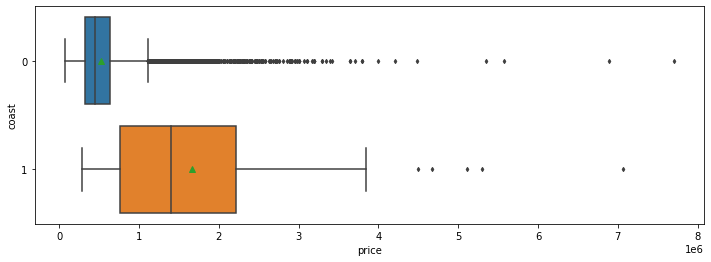

point biserial correlation r is 0.2663321082728777 with p = 0.0


In [23]:
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'coast', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['coast'], data['price'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

Comments:

The no coast box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other.
The coast box plot is comparatively tall. This suggests that house prices differ greatly in this group.
There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a water view. This is validated by a positive value of the point-biserial correlation.
The correlation is however small (r<0.3). Aslo, the distribution of coast it self is not normal, as there are only 163 recods with coast =1. 

We can run the same test on the basement_present variable and whether or not the house had been renovated in the past.

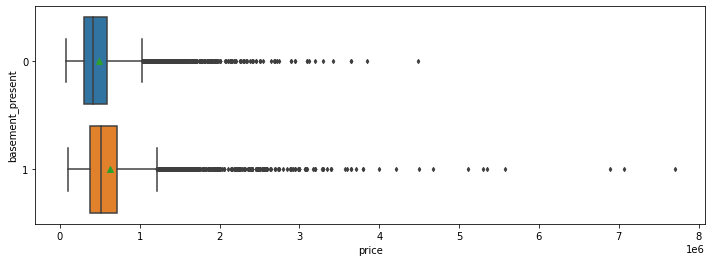

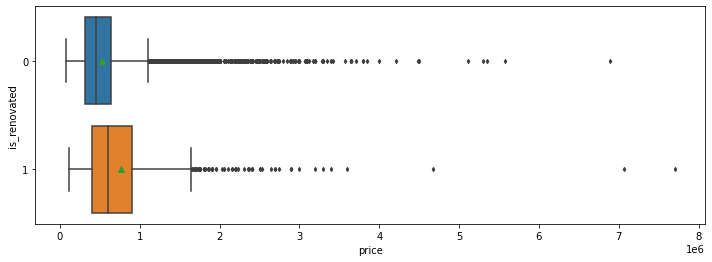

In [24]:
# basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'is_renovated', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()


Associations exist but they are fairly small (0.1 < r < 0.3).

Let's move on to our ordinal variables and asses their association with house price. We will show the distribution of the categories of each variable using boxplots.

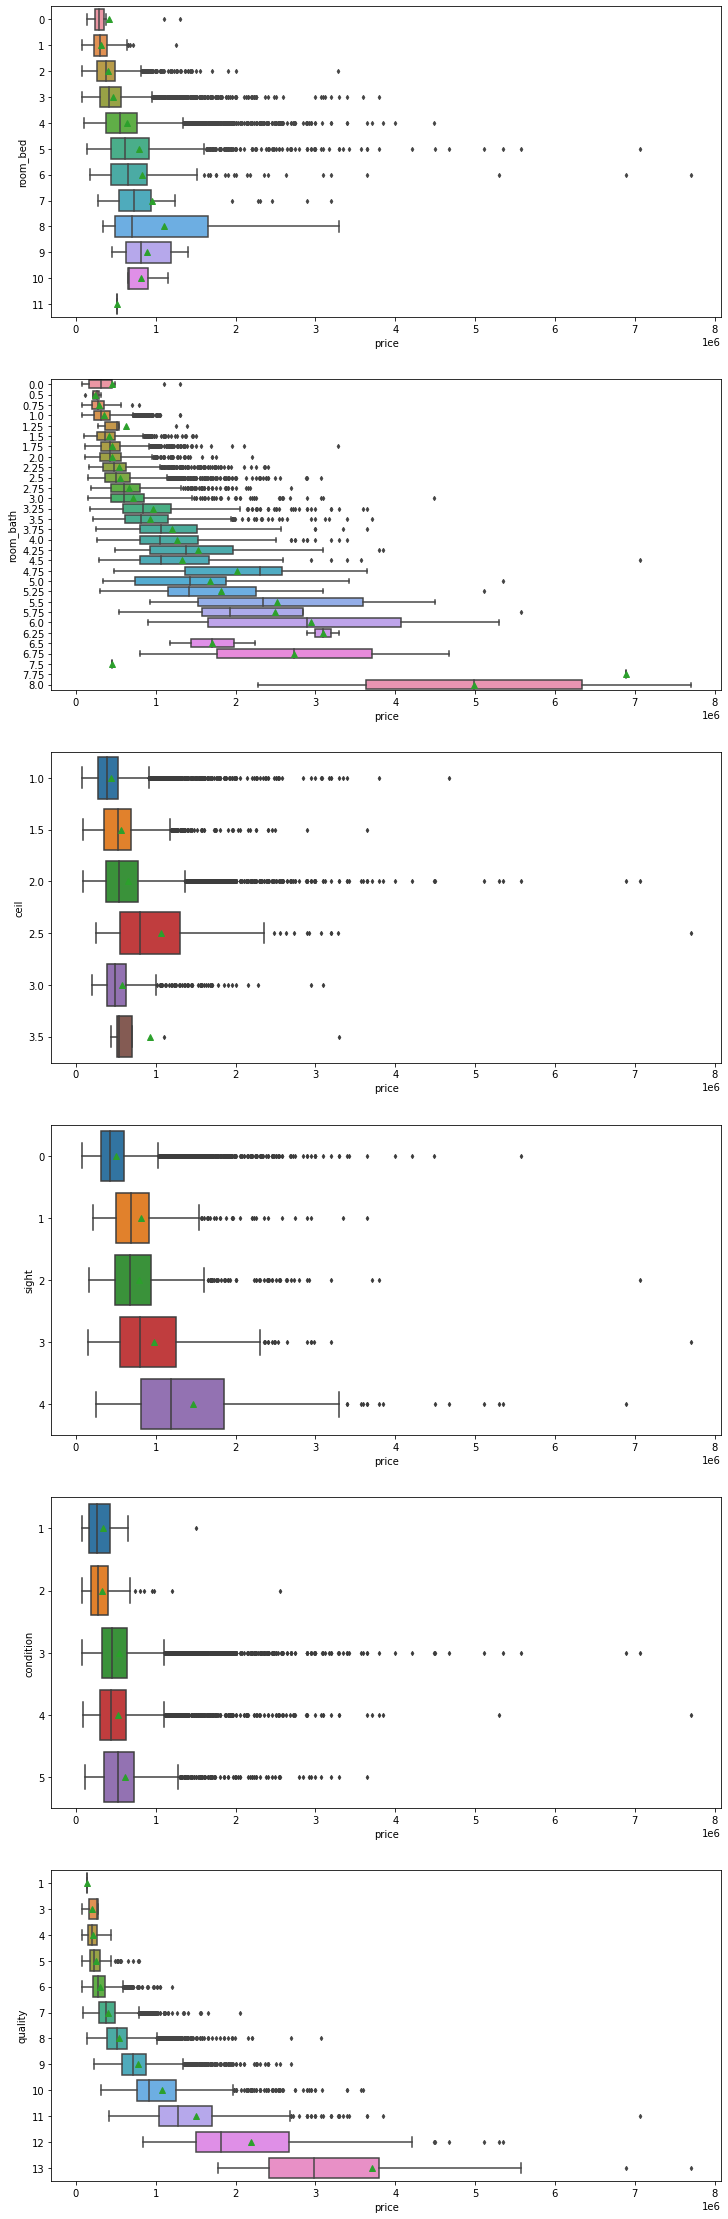

In [25]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'room_bed', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'room_bath', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'ceil', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'sight', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'quality', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

As expected, they all seem to be related to the house price.

We can use the Spearman's rank-order correlation to measure the strength and direction of the relationships between house price and these variables.

In [26]:
r, p = stats.spearmanr(data['room_bed'], data['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['room_bath'], data['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['ceil'], data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(data['sight'], data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.34460979407309283 with p = 0.0
spearman correlation r between price and bathrooms is 0.4971996090966737 with p = 0.0
spearman correlation r between price and floors is 0.32239811416550335 with p = 0.0
spearman correlation r between price and view is 0.2939417647353363 with p = 0.0


There is indeed associations between these variables and the house price.

Conclusion:

* living_measure, ceil_measure and basement were moderately/strongly associated with price. Paerson r was equal to 0.70, 0.61 and 0.41, respectively.
* The 3 variables were also strongly related to each other as living_measure  = ceil_measure + basement.
* living_measure15 is also strongly related to price (r = 0.59) . However, when controlling for living_measure, the relationship disappeared ( r=0.06 ).
lot_measure, lot_measure15) and yr_built were poorly related to price.
The three boolean variables (coast, basement_present, is_renovated) were associated with price. The associations were small (r < 0.3)
Five of the ordinal parameters (bedrooms, bathrooms, ceil, sight, quality) were also moderately to strongly associated with price.

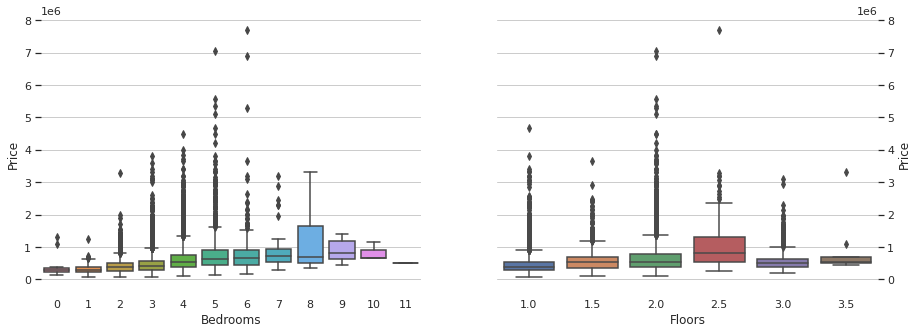

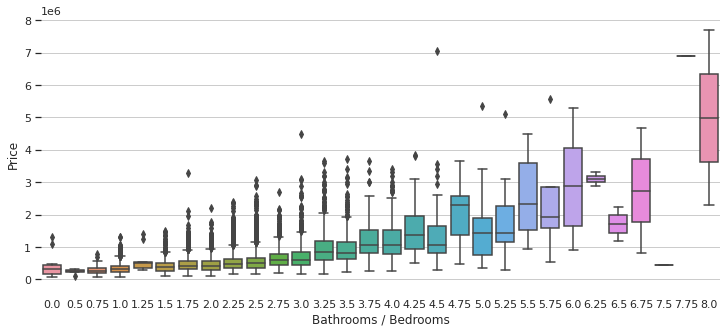

In [27]:
##bi-variate analysis
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['room_bed'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['ceil'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=data['room_bath'],y=data['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

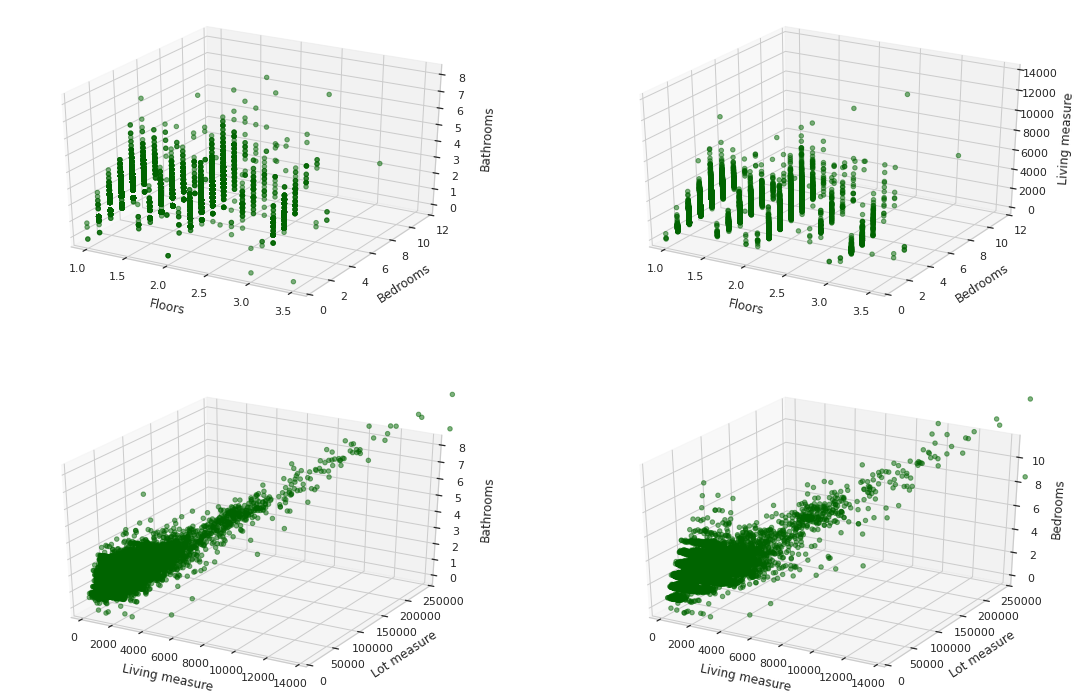

In [28]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(data['ceil'],data['room_bed'],data['room_bath'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(data['ceil'],data['room_bed'],data['living_measure'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nLiving measure')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(data['living_measure'],data['lot_measure'],data['room_bath'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nLiving measure',ylabel='\nLot measure',zlabel='\nBathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(data['living_measure'],data['lot_measure'],data['room_bed'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nLiving measure',ylabel='\nLot measure',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

**Observation:**

* when plotting price vs some features, it seems that there is not a perfect linear relationship between the price and these features.
* Hence, plotted 3d plots, to show the relationship among each other. The above charts show that when the living_measure increases, lot_measure and room_bed or room_bath increases. However, the floors, bedrooms and bathrooms do not have a similar relationship.

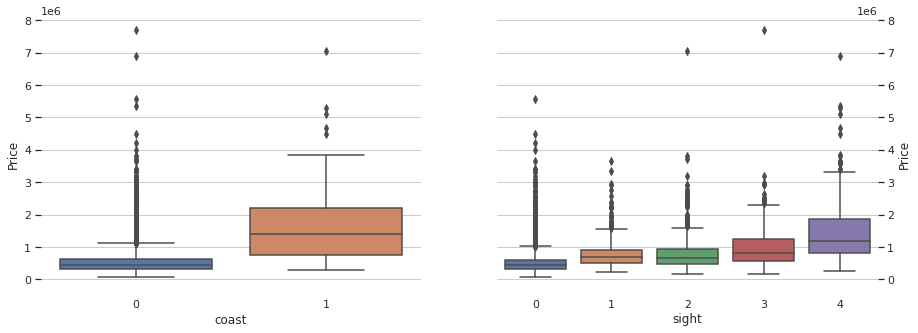

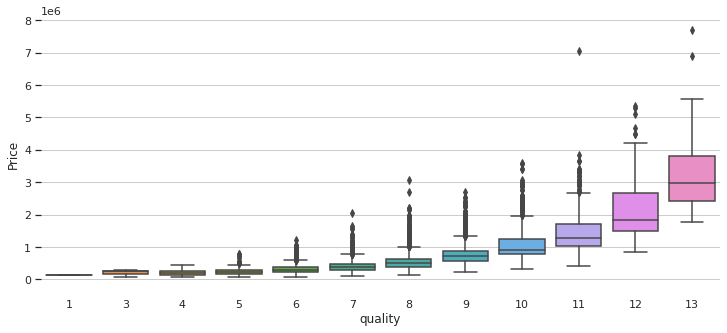

In [29]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=data['coast'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['sight'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='coast', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='sight', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=data['quality'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='quality', ylabel='Price');

**observation:**

* From the above boxplots, it is clear that  quality and coast effect price visibly. On the other hand, sight seem to effect less.

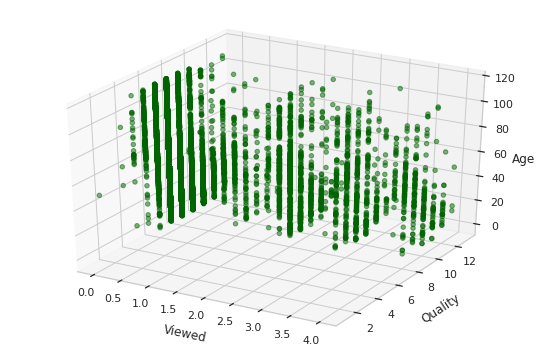

In [30]:
fig=plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(data['sight'],data['quality'],data['house_age'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nViewed',ylabel='\nQuality',zlabel='\nAge');

**observation:**

*   The 3D plot above, determines the relation between the sight, quality and age. The above chart shows that older houses have better quality but we can not say much about the no of times viewed.

Checking Out the Correlation Among Explanatory Variables

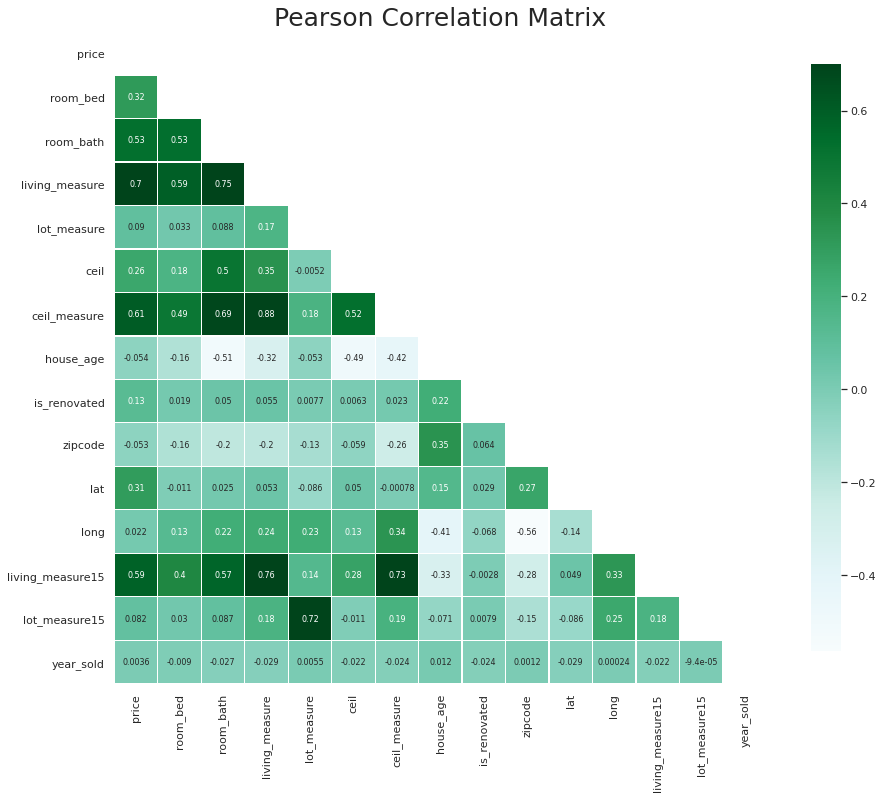

In [32]:
features = ['price','room_bed','room_bath','living_measure','lot_measure','ceil','coast',
            'sight','condition','quality','ceil_measure','basement_present','house_age','is_renovated',
            'zipcode','lat','long','living_measure15','lot_measure15','year_sold']

mask = np.zeros_like(data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [33]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = data.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price               1.00
living_measure      0.70
ceil_measure        0.61
living_measure15    0.59
room_bath           0.53
room_bed            0.32
lat                 0.31
ceil                0.26
is_renovated        0.13
total_area          0.10
lot_measure         0.09
lot_measure15       0.08
long                0.02
year_sold           0.00
month_sold         -0.01
zipcode            -0.05
house_age          -0.05
Name: price, dtype: float64


In [34]:
train_heat=data[data["price"].notnull()]
feature_corr = train_heat.corr().abs()
target_corr=data.corr()["price"].abs()
target_corr=pd.DataFrame(target_corr)
target_corr=target_corr.reset_index()
feature_corr_unstack= feature_corr.unstack()
df_fc=pd.DataFrame(feature_corr_unstack,columns=["corr"])
df_fc=df_fc[(df_fc["corr"]>=.80)&(df_fc["corr"]<1)].sort_values(by="corr",ascending=False)
df_dc=df_fc.reset_index()

#df_dc=pd.melt(df_dc, id_vars=['corr'], var_name='Name')
target_corr=df_dc.merge(target_corr, left_on='level_1', right_on='index',
          suffixes=('_left', '_right'))

cols=target_corr["level_0"].values

target_corr

,level_0,level_1,corr,index,price
0,lot_measure,total_area,1.00,total_area,0.10
1,total_area,lot_measure,1.00,lot_measure,0.09
2,living_measure,ceil_measure,0.88,ceil_measure,0.61
3,ceil_measure,living_measure,0.88,living_measure,0.70


In [35]:
data=data.drop(['ceil_measure'],axis=1)

In [36]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ('quality','condition','coast','sight','furnished')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(data[col].values)) 
    data[col] = label.transform(list(data[col].values))

print('Shape all_data: {}'.format(data.shape))

Shape all_data: (21612, 22)


Feature Selection Feature Selection is the technique of Feature engineering which analyzes the feature space to squeze out all the information to explain as much as variance it can there by getting rid of few unrelated dimensions.

Standardization Standardization with z-scores is the most commonly used method. It converts all indicators to a common scale with an average/mean of 0 and standard deviation of 1. As most of the features in our dataset have units Kg/m3 and age and strength have days and MPa as the units of measurements respectively, we apply z-score to convert them into a single scale.

In [37]:
data = data.apply(zscore)
data.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,long,living_measure15,lot_measure15,furnished,total_area,house_age,is_renovated,year_sold,month_sold,basement_present
count,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,...,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00,21612.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.27,-3.71,-2.75,-1.95,-0.35,-0.92,-0.09,-0.31,-3.70,-4.81,...,-2.17,-2.32,-0.44,-0.49,-0.38,-1.51,-0.21,-0.69,-1.79,-0.80
25%,-0.59,-0.41,-0.47,-0.71,-0.24,-0.92,-0.09,-0.31,-0.63,-0.56,...,-0.81,-0.72,-0.28,-0.49,-0.24,-0.86,-0.21,-0.69,-0.83,-0.80
50%,-0.25,-0.41,0.18,-0.19,-0.18,0.01,-0.09,-0.31,-0.63,-0.56,...,-0.11,-0.21,-0.19,-0.49,-0.18,-0.11,-0.21,-0.69,-0.18,-0.80
75%,0.29,0.69,0.50,0.51,-0.11,0.94,-0.09,-0.31,0.91,0.29,...,0.63,0.54,-0.10,-0.49,-0.10,0.67,-0.21,1.45,0.78,1.24
max,19.49,8.40,7.64,12.48,39.50,3.71,11.47,4.91,2.44,4.55,...,6.38,6.16,31.44,2.02,39.32,2.44,4.76,1.45,1.74,1.24


Principal Component Analysis: Principal Component Analysis (PCA) uses "orthogonal linear transformation" to introduces a lower-dimensional representation of the dataset. It finds a sequence of linear combination of the variables called the principal components that explain the maximum variance and summarize the most information in the data and are mutually uncorrelated with each other. PCA allows us to quantify the trade-offs between the number of features we utilize and the total variance explained by the data. Let's analyze PCA to find out no of features which can explain more than 97% of cumulative variance.

In [38]:
# Create a covariance matrix and calculate eigen values
pca = PCA().fit(data.drop('price', axis=1))
# calculate variance ratios
var = pca.explained_variance_ratio_;var

array([2.38952249e-01, 1.25188778e-01, 9.97450485e-02, 8.48912180e-02,
       6.51394372e-02, 5.99539928e-02, 4.80091265e-02, 4.46964309e-02,
       3.94623210e-02, 3.54467304e-02, 2.89414085e-02, 2.55374078e-02,
       1.95350565e-02, 1.72634689e-02, 1.60008364e-02, 1.53208125e-02,
       1.15454261e-02, 1.02946391e-02, 7.65146639e-03, 6.42414514e-03,
       1.81951244e-32])

In [39]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(pca.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([ 23.9,  36.4,  46.4,  54.9,  61.4,  67.4,  72.2,  76.7,  80.6,
        84.1,  87. ,  89.6,  91.6,  93.3,  94.9,  96.4,  97.6,  98.6,
        99.4, 100. , 100. ])

In [53]:
# Create a new matrix using the n components
X = data.drop('price', axis=1)
y = data.price


Train Test Split


In [54]:
# Divide the original and the projected dataset into 80:20 ration for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Dimensions for train test split:\n', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Dimensions for train test split:
 (17289, 21) (4323, 21) (17289,) (4323,)


# **Regression Analysis:**

Let's now begin to train our regression model. We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. 

**Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

* Mean Absolute Error (MAE) is the mean of the absolute value of the errors
* Mean Squared Error (MSE) is the mean of the squared errors
* Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

**Comparing these metrics:**

* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions. Hence, we need to minimize them.

Training score  : 0.700648100860632
Testing score   : 0.7096089890263835
Root Mean Squared Error (RMSE): 0.5233501976529825
LR: 0.698278 (+/- 0.053154)
Training score  : 0.7006481008241234
Testing score   : 0.7096091138110683
Root Mean Squared Error (RMSE): 0.5233500852078757
RidgeRegression: 0.698280 (+/- 0.053154)
Training score  : 0.6309377064959889
Testing score   : 0.6382661492791508
Root Mean Squared Error (RMSE): 0.5841109986304354
LassoRegression: 0.631490 (+/- 0.046193)
Training score  : 0.2080005028063845
Testing score   : 0.20906221704837735
Root Mean Squared Error (RMSE): 0.8637179976763228
ElasticNet: 0.172929 (+/- 0.019223)
Training score  : 0.9828561681103609
Testing score   : 0.8898601308862748
Root Mean Squared Error (RMSE): 0.32230948498434286
RF_reg: 0.843837 (+/- 0.029477)
Training score  : 0.9999999975355365
Testing score   : 0.7518723862146315
Root Mean Squared Error (RMSE): 0.4837693591579654
DesicionTree_reg: 0.667486 (+/- 0.099928)
Training score  : 0.849652194

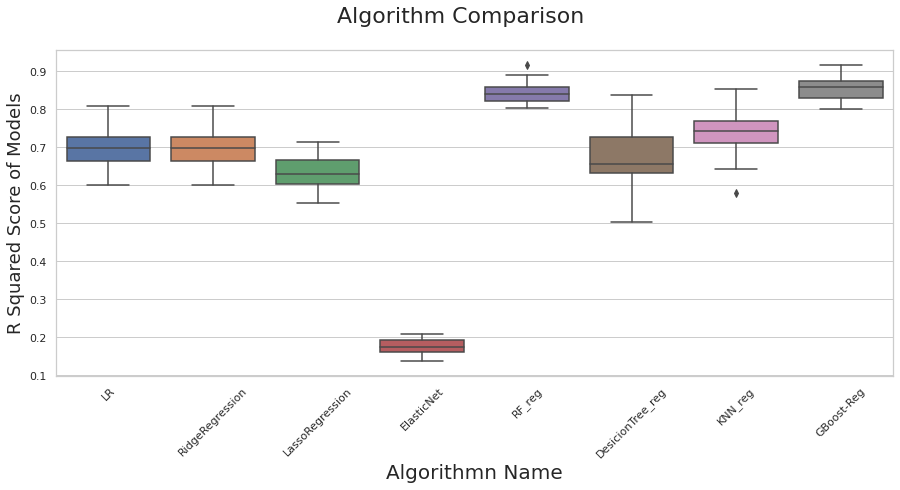

In [55]:
pipelines = []
seed = 1

pipelines.append(
                ("LR", 
                 Pipeline([
                     ("LR", LinearRegression())
                      ]))
                )
pipelines.append(
                ("RidgeRegression", 
                 Pipeline([
                     ("Ridge", Ridge(alpha=0.1,random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("LassoRegression", 
                 Pipeline([
                     ("Lasso", Lasso(alpha=0.1,random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("ElasticNet", 
                 Pipeline([
                    ("ElasticNet", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("RF_reg",
                 Pipeline([
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("DesicionTree_reg",
                 Pipeline([
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("KNN_reg",
                 Pipeline([
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("GBoost-Reg",
                 Pipeline([
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))


scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    model.fit(X_train, y_train)
    # Calculate the score 
    print('Training score  :', model.score(X_train, y_train))
    print('Testing score   :', model.score(X_test, y_test))
    # Calculate RMSE
    print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    cv_results = cross_val_score(model, X_test, y_test, cv=20, scoring='r2', n_jobs=-1)
    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Observations:

LR,Ridge,LASSO and ElasticNet gives very poor result for the dataset. Mean $R^2$ cross validation score is not at all promising. Random Forest and gradient boosting algoriths have a good score.

Random Forest Regressor Bagging Regressor Gradient Boosting Regressor Support Vector Regressor Iteration 1 - Linear Kernel

In [56]:
#Decision Tree Regressor Iteration 1 - Unpruned tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [57]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))

Training score  : 0.9999999975355365
Testing score   : 0.7646664020895766


In [59]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.4711321869089838


In [69]:
# Calculate Cross Validation Score
dtr_cv = cross_val_score(dtr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_cv.mean())
print ("cv-std  :",dtr_cv.std())
print ("cv-max  :",dtr_cv.max())
print ("cv-min  :",dtr_cv.min())

cv-mean : -0.3109217857204086
cv-std  : 0.11068608950630787
cv-max  : -0.1752316016262767
cv-min  : -0.6360273327731956


Observations:

Though the training score and mean r-squared scores are very good, the huge drop in accuracy from training score to testing score indicates this model is highly overfit. This is the nature of Decision tree. Unless pruned, it tend to grow to the fullest untill extreme lowest node. Let's prune the Decision Tree in iteration 2

In [60]:
##Iteration 2 - Regularized Decision Tree
dtr = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=9)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:

# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))

Training score  : 0.7792766803707123
Testing score   : 0.7421450134244352


In [62]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.49316083067459987


In [64]:
# Calculate Cross Validation Score
dtr_cv = cross_val_score(dtr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_cv.mean())
print ("cv-std  :",dtr_cv.std())
print ("cv-max  :",dtr_cv.max())
print ("cv-min  :",dtr_cv.min())

cv-mean : -0.28699452407542403
cv-std  : 0.09823777383330162
cv-max  : -0.13321440207987453
cv-min  : -0.5527305213019466


Text(0, 0.5, 'values')

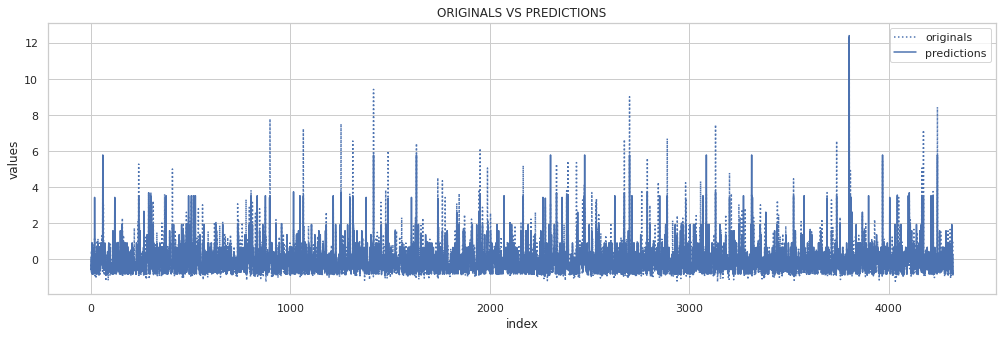

In [65]:
ax = y_test.reset_index()['price'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(dtr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='b')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

A pruned decision tree with max_depth=6, max_leaf_nodes=40 and min_samples_leaf=9 gives a slightly better result compared to unpruned tree. And it is not overfit as well. Let's analyze Feature Importance.

In [67]:
##Feature Importance
# Feature Importance
dtr_df_fi = pd.DataFrame(dtr.feature_importances_, index = data.columns[:-1], columns=['Importance'])
dtr_df_fi.sort_values('Importance', ascending=False)

,Importance
condition,0.42
room_bath,0.31
zipcode,0.17
lat,0.06
ceil,0.02
long,0.01
coast,0.01
total_area,0.01
living_measure15,0.00
lot_measure15,0.00


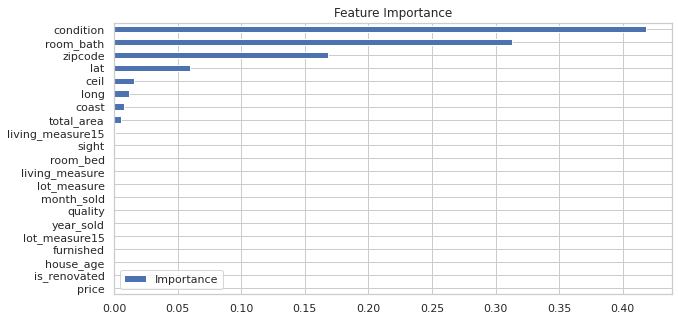

In [68]:
# Visualize the Feature Importances
dtr_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='b', title='Feature Importance')


year_sold, month_sold, lot_measure15, furnished, is_renovated and house_age features are identified to be of less important. Let's check the model performance by dropping them in Iteration 3

In [69]:
##Iteration 3 - Removing less important feature
labels = ['year_sold', 'month_sold', 'lot_measure15', 'furnished','is_renovated','house_age']
X_dtr_fi_train = X_train.drop(labels=labels, axis=1)
X_dtr_fi_test = X_test.drop(labels=labels, axis=1)
dtr_fi = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=9)
dtr_fi.fit(X_dtr_fi_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr_fi.score(X_dtr_fi_train, y_train))
print('Testing score   :', dtr_fi.score(X_dtr_fi_test, y_test))

Training score  : 0.7786544626301396
Testing score   : 0.7419712559065342


In [71]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr_fi.predict(X_dtr_fi_test))))

Root Mean Squared Error (RMSE): 0.49332696275543236


In [72]:
# Calculate Cross Validation Score
dtr_fi_cv = cross_val_score(dtr_fi, X_dtr_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_fi_cv.mean())
print ("cv-std  :",dtr_fi_cv.std())
print ("cv-max  :",dtr_fi_cv.max())
print ("cv-min  :",dtr_fi_cv.min())

cv-mean : -0.28343792427530773
cv-std  : 0.09177063211047978
cv-max  : -0.12984100220259834
cv-min  : -0.534121816571039


Observations:

No improvement in performance with removal of less important features. Let's analyze the ensemble techniques.

Ensemble Techniques

Bagging

Random subsets are created from the original dataset (Bootstrapping). The subset of the dataset includes all features. A user-specified base estimator is fitted on each of these smaller sets. Predictions from each model are combined to get the final result.
Random Forest Regressor :
Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree. Following are the steps of the Random Forest algorithm:

Random subsets are created from the original dataset (bootstrapping). At each node in the decision tree, only a random set of features are considered to decide the best split. A decision tree model is fitted on each of the subsets. The final prediction is calculated by averaging the predictions from all decision trees. Iteration 1

In [73]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
# Calculate the score of RF Regressor
print('Training score  :', rfr.score(X_train, y_train))
print('Testing score   :', rfr.score(X_test, y_test))

Training score  : 0.982875426372039
Testing score   : 0.8909918705952878


In [78]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.32064926721430653


In [76]:
# Calculate Cross Validation Score
rfr_cv = cross_val_score(rfr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rfr_cv.mean())
print ("cv-std  :",rfr_cv.std())
print ("cv-max  :",rfr_cv.max())
print ("cv-min  :",rfr_cv.min())

cv-mean : -0.14181009893502372
cv-std  : 0.04440636484565714
cv-max  : -0.0767575825605589
cv-min  : -0.2731111569290527


Text(0, 0.5, 'values')

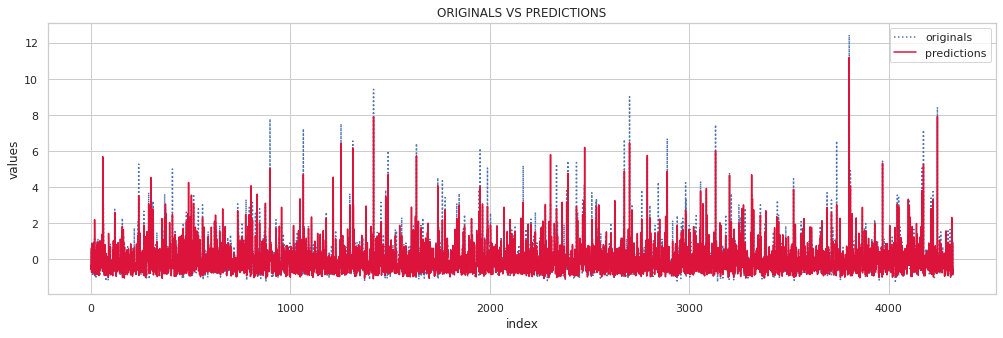

In [79]:
ax = y_test.reset_index()['price'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(rfr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='crimson')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

The accuracy of Random Forest regressor on training is quite impressive and it is not overfit as well. Let's analyze the Feature Importance.

Feature Importance

In [80]:
# Feature Importance
rfr_df_fi = pd.DataFrame(rfr.feature_importances_, index = data.columns[:-1], columns=['Importance'])
rfr_df_fi.sort_values('Importance', ascending=False)

,Importance
room_bath,0.28
condition,0.23
zipcode,0.16
lot_measure15,0.09
lat,0.07
long,0.03
ceil,0.03
total_area,0.02
living_measure15,0.01
quality,0.01


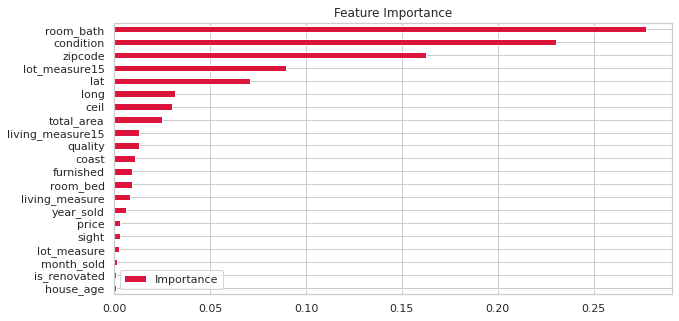

In [81]:
# Visualize the Feature Importances
rfr_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='crimson', title='Feature Importance')

year_sold, sight, lot_measure,month_sold,is_renovated and house_age features are identified to be of less important. Let's check the model performance by dropping them in Iteration 2 Iteration 2 - Removing less important feature

In [82]:
labels = ['year_sold', 'sight', 'lot_measure', 'month_sold','is_renovated','house_age']
X_rfr_fi_train = X_train.drop(labels=labels, axis=1)
X_rfr_fi_test = X_test.drop(labels=labels, axis=1)
rfr_fi = RandomForestRegressor()
rfr_fi.fit(X_rfr_fi_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
#Calculate the score of RF Regressor
print('Training score  :', rfr_fi.score(X_rfr_fi_train, y_train))
print('Testing score   :', rfr_fi.score(X_rfr_fi_test, y_test))

Training score  : 0.982130657314622
Testing score   : 0.8862150809159732


In [84]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr_fi.predict(X_rfr_fi_test))))

Root Mean Squared Error (RMSE): 0.32759944752567727


In [85]:
# Calculate Cross Validation Score
rfr_fi_cv = cross_val_score(rfr_fi, X_rfr_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rfr_fi_cv.mean())
print ("cv-std  :",rfr_fi_cv.std())
print ("cv-max  :",rfr_fi_cv.max())
print ("cv-min  :",rfr_fi_cv.min())

cv-mean : -0.14110579271815546
cv-std  : 0.03516970438419726
cv-max  : -0.08554193056168624
cv-min  : -0.22326339910283102


Observations:

Performance is not effected by removal of less important features.

Gradient Boosting Regressor (GBM) :
Gradient Boosting is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

Iteration 1

In [86]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
# Calculate the score of GBRegressor
print('Training score  :', gbm.score(X_train, y_train))
print('Testing score   :', gbm.score(X_test, y_test))

Training score  : 0.9012996336544432
Testing score   : 0.8804834760717083


In [88]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm.predict(X_test))))

Root Mean Squared Error (RMSE): 0.33574904411634227


In [89]:
# Calculate Cross Validation Score
gbm_cv = cross_val_score(gbm, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_cv.mean())
print ("cv-std  :",gbm_cv.std())
print ("cv-max  :",gbm_cv.max())
print ("cv-min  :",gbm_cv.min())

cv-mean : -0.13231182615302808
cv-std  : 0.03812686757605837
cv-max  : -0.06725595356937938
cv-min  : -0.21530002225317893


Observations:

The accuracy of Gradient Boosting regressor is highest among all and it is not overfit as well. Let's analyze the Feature Importance.

In [100]:
# Feature Importance
gbm_df_fi = pd.DataFrame(gbm.feature_importances_, index = data.columns[:-1], columns=['Importance'])
gbm_df_fi.sort_values('Importance', ascending=False)

,Importance
room_bath,0.32
condition,0.25
zipcode,0.15
lat,0.07
lot_measure15,0.06
ceil,0.04
total_area,0.03
long,0.03
coast,0.02
quality,0.01


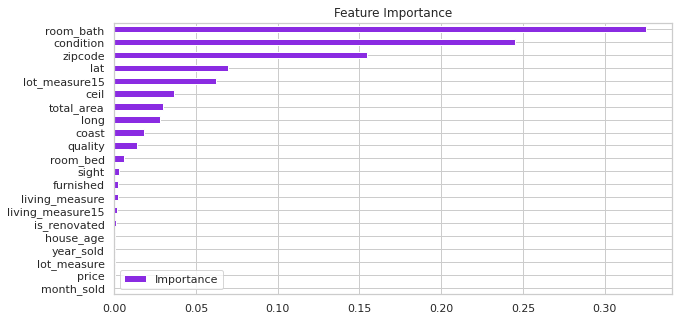

In [101]:
# Visualize the Feature Importances
gbm_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='blueviolet', title='Feature Importance')

In [ ]:
year_sold, lot_measure,month_sold,is_renovated and house_age features are identified to be of less important. Let's check the model performance by dropping them in Iteration 

 Iteration 2 - Removing less important feature

In [102]:
labels = ['year_sold', 'lot_measure', 'month_sold','is_renovated','house_age']
X_gbm_fi_train = X_train.drop(labels=labels, axis=1)
X_gbm_fi_test = X_test.drop(labels=labels, axis=1)
gbm_fi = GradientBoostingRegressor()
gbm_fi.fit(X_gbm_fi_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [103]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', gbm_fi.score(X_gbm_fi_train, y_train))
print('Testing score   :', gbm_fi.score(X_gbm_fi_test, y_test))

Training score  : 0.896319242186012
Testing score   : 0.8755528797387598


In [104]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_fi.predict(X_gbm_fi_test))))

Root Mean Squared Error (RMSE): 0.3426046348023169


In [105]:
# Calculate Cross Validation Score
gbm_fi_cv = cross_val_score(gbm_fi, X_gbm_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_fi_cv.mean())
print ("cv-std  :",gbm_fi_cv.std())
print ("cv-max  :",gbm_fi_cv.max())
print ("cv-min  :",gbm_fi_cv.min())

cv-mean : -0.135231143832739
cv-std  : 0.03579036850320741
cv-max  : -0.06150925708027278
cv-min  : -0.2009330826576106


Text(0, 0.5, 'values')

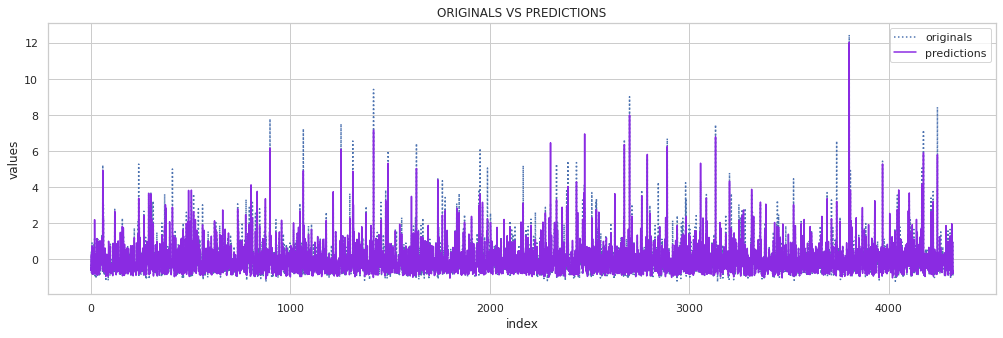

In [106]:

ax = y_test.reset_index()['price'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(gbm_fi.predict(X_gbm_fi_test)).plot(label = "predictions",figsize=(17,5),color='blueviolet')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [ ]:
we are going to consider Gradient Boosting Regressor as our best suited model. 

Conclusion Summing up all the observations 
Gradient Boosting ensemble technique stood pretty well in predicting the house prices. The model that is fined tuned with hyperparameter tuning, is able to predict with 85.9% to 91.2% accuracy with 95% confidence level.